In [12]:
import matplotlib.pyplot as plt

import numpy as np
import ROOT, uproot
#root_numpy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# import necessary keras modules/functions
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, MaxPooling2D
from keras.layers import BatchNormalization, Activation, AveragePooling2D, Concatenate

from utils import PlotLearning

In [13]:
events = uproot.open("../FlatTree_Production/Z_Candidates_100k.root")["candidateTree"]
events.keys()

['nRecLep',
 'recLepPt1',
 'recLepEta1',
 'recLepPhi1',
 'recLepIsoVar1',
 'recLepCharge1',
 'recLepPDGID1',
 'recLepPt2',
 'recLepEta2',
 'recLepPhi2',
 'recLepIsoVar2',
 'recLepCharge2',
 'recLepPDGID2',
 'recLepInvMass',
 'genLepInvMass']

In [14]:
data = events.arrays(events.keys())

array = []
for i in events.keys():
    array.append(events.array(i))

array = np.array(array)

In [15]:
data = array.T
nBins=20
kappa=8
nvar=14
massMin=50
massMax=130
Z_mass=91.1876
epochs=50;
#[list(i) for i in root_numpy.tree2array(outTree, start=0, stop = n_events)]

binwidth = ((massMax-massMin)/nBins)
bins = np.array(range(massMin, massMax+binwidth, binwidth))
print(bins)

[ 50  54  58  62  66  70  74  78  82  86  90  94  98 102 106 110 114 118
 122 126 130]


In [23]:
data = array.T
nBins=20
kappa=8
nvar=14
massMin=50
massMax=130
Z_mass=91.1876
epochs=50;
#[list(i) for i in root_numpy.tree2array(outTree, start=0, stop = n_events)]

binwidth = ((massMax-massMin)/nBins)
bins = np.array(range(massMin, massMax+binwidth, binwidth))

x = np.array([i[:-1] for i in data])
y = np.array([i[-1] for i in data])
for i in range(len(y)):
    y[i] = np.trunc((y[i]-massMin)*nBins/(massMax-massMin))
    #np.searchsorted(bins, y[i])
ycat = keras.utils.to_categorical(y, nBins)

x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x, ycat, test_size=0.2, random_state=42)

print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#print(ycat)[0]

(16384, 14)
('x_train shape:', (16384, 14, 1))
(16384, 'train samples')
(4096, 'test samples')


In [24]:
model = Sequential()
#,input_shape=(64, nvar)
model.add(Dense(nvar,activation='linear',input_shape=(nvar,1)))
model.add(Flatten())
model.add(Dense(kappa*nBins**2,activation='relu'))
    
    # model.add(Dropout(0.25))
    # model.add(Dense(2*NBins,activation='relu'))
    # model.add(Dropout(0.5))
model.add(Dense(nBins,activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 14, 14)            28        
_________________________________________________________________
flatten_2 (Flatten)          (None, 196)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3200)              630400    
_________________________________________________________________
dense_6 (Dense)              (None, 20)                64020     
Total params: 694,448
Trainable params: 694,448
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Define additional callbacks

def reduce_lr(patience_lr):
    reduce_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=patience_lr, verbose=1, min_delta=1e-4, mode='auto')
    return reduce_lr_loss

callbacks = [reduce_lr(patience_lr=20), PlotLearning()]

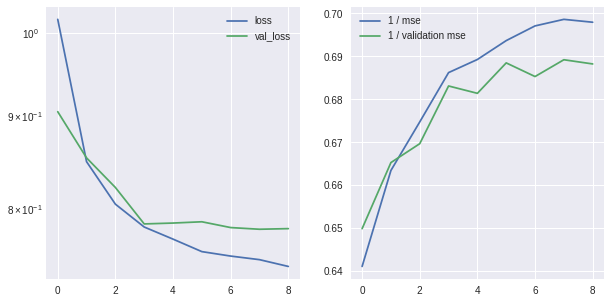

Epoch 10/50
 6208/16384 [==========>...................] - ETA: 1s - loss: 0.7388 - acc: 0.703

KeyboardInterrupt: 

In [26]:
# 
history = model.fit(x_train, y_train, epochs=50, batch_size=64,  verbose=1, validation_data=(x_test, y_test), callbacks = callbacks)

array([1.9036083e-06, 4.1161195e-07, 3.0961723e-07, 2.6704933e-07,
       1.2422784e-07, 6.9284724e-08, 8.0406304e-09, 1.2589602e-09,
       1.6061198e-07, 3.8668364e-02, 7.1913451e-01, 2.3082288e-01,
       9.5636789e-03, 1.6621242e-03, 1.1149851e-04, 2.1299946e-05,
       1.0922756e-05, 4.3865199e-07, 7.1014810e-08, 8.1787022e-07],
      dtype=float32)